In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

### Examplaratory Sociogram
<img src="https://sociogramcreator.com/wp-content/uploads/2022/02/SociogramPresenteraResultatUtanMeny.png" />

In [2]:
# The index and columns represent individual entities (people in the sociogram)
data = {          # 1  2  3  4  5  6  7  8  9 10 11 12 13 
    '1 Louisa':    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1
    '2 Peter':     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2
    '3 Frederic':  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], # 3
    '4 Idris':     [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], # 4
    '5 Anna':      [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], # 5
    '6 Beatrice':  [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], # 6
    '7 Davic':     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], # 7
    '8 Eric':      [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], # 8
    '9 Cecilia':   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], # 9
    '10 Johanna':  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], # 10
    '11 Travis':   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 11
    '12 Sadio':    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], # 12
    '13 Hannah':   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]  # 13
}

adjacency_matrix = pd.DataFrame(data, index=data.keys())
G = nx.from_pandas_adjacency(adjacency_matrix, create_using=nx.DiGraph())

In [3]:
def plot_sociagram(G, communities, pos):
    community_colors = {node: idx for idx, community in enumerate(communities) for node in community}
    colors = [community_colors[node] for node in G.nodes()]
    colors = plt.cm.Pastel1(colors)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_color=colors, with_labels=True, node_size=700, font_size=10, font_weight='bold')
    plt.show()

### Community Detection
Use Louvain algorithm for community detection in large networks. It operates iteratively, optimizing modularity by first assigning each node to its own community and then merging communities in a way that maximizes the modularity gain. Used for uncovering the underlying structure in social networks, biological networks, and other complex systems.

In [4]:
communities = nx.algorithms.community.louvain_communities(G)
print(communities)

[{'1 Louisa', '3 Frederic', '2 Peter'}, {'11 Travis', '13 Hannah', '9 Cecilia', '6 Beatrice', '7 Davic'}, {'4 Idris', '12 Sadio', '10 Johanna', '5 Anna', '8 Eric'}]


### Initial Positioning
The force-directed graph drawing algorithm, often known as the Fruchterman-Reingold algorithm, models the network as a system of springs, where nodes repel each other like charged particles, while edges attract their endpoints like springs.
It iteratively adjusts the positions of the nodes to minimize the energy of the system, resulting in a layout where the edges tend to have uniform length and there are as few crossing edges as possible.

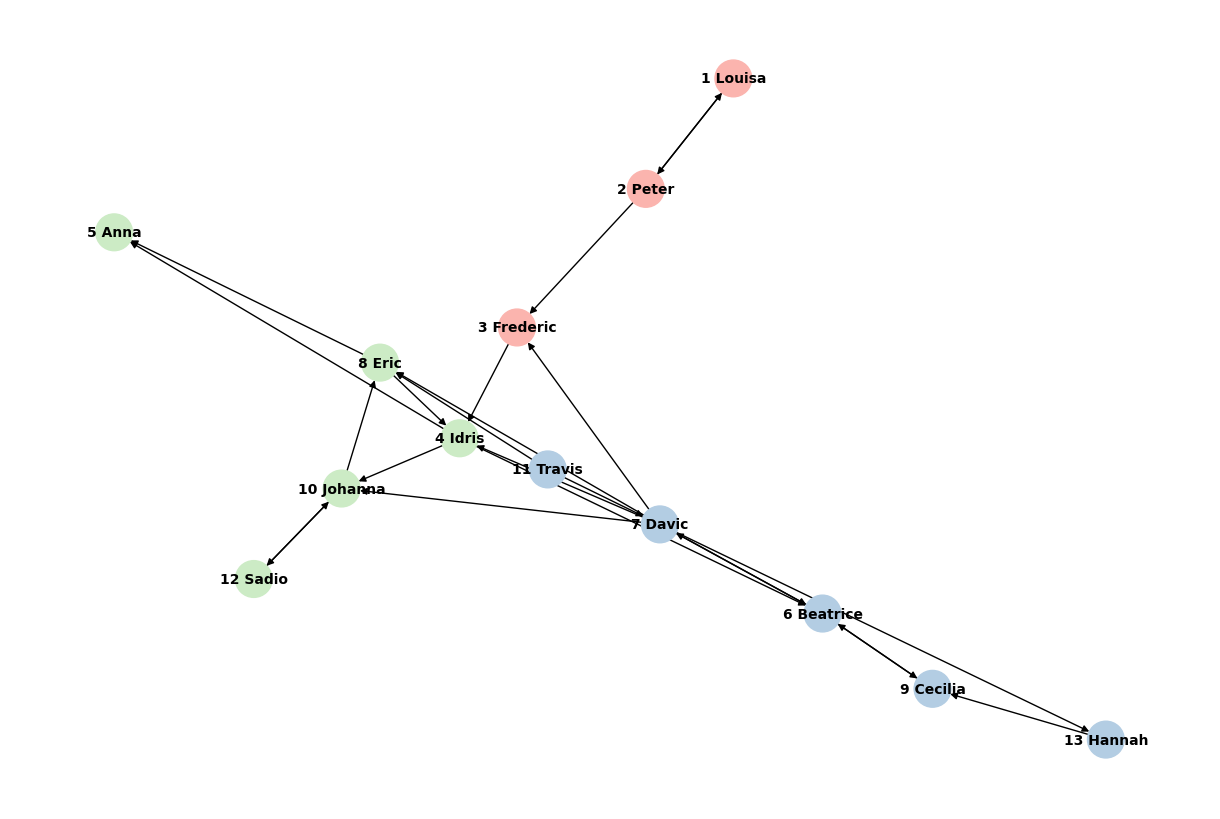

In [5]:
initial_pos = nx.spring_layout(G)
plot_sociagram(G, communities, initial_pos)

### Optimization
The Kamada-Kawai algorithm aims to position nodes of a graph in two-dimensional space to reflect their pairwise graph-theoretical distances. It treats the graph as a mechanical system, with a global energy function dependent on the distances between all pairs of nodes. The algorithm iteratively adjusts node positions to minimize the total energy. This method is particularly useful for producing aesthetically pleasing layouts of dense graphs and is often applied as a refinement step following an initial layout from algorithms like `spring_layout`.

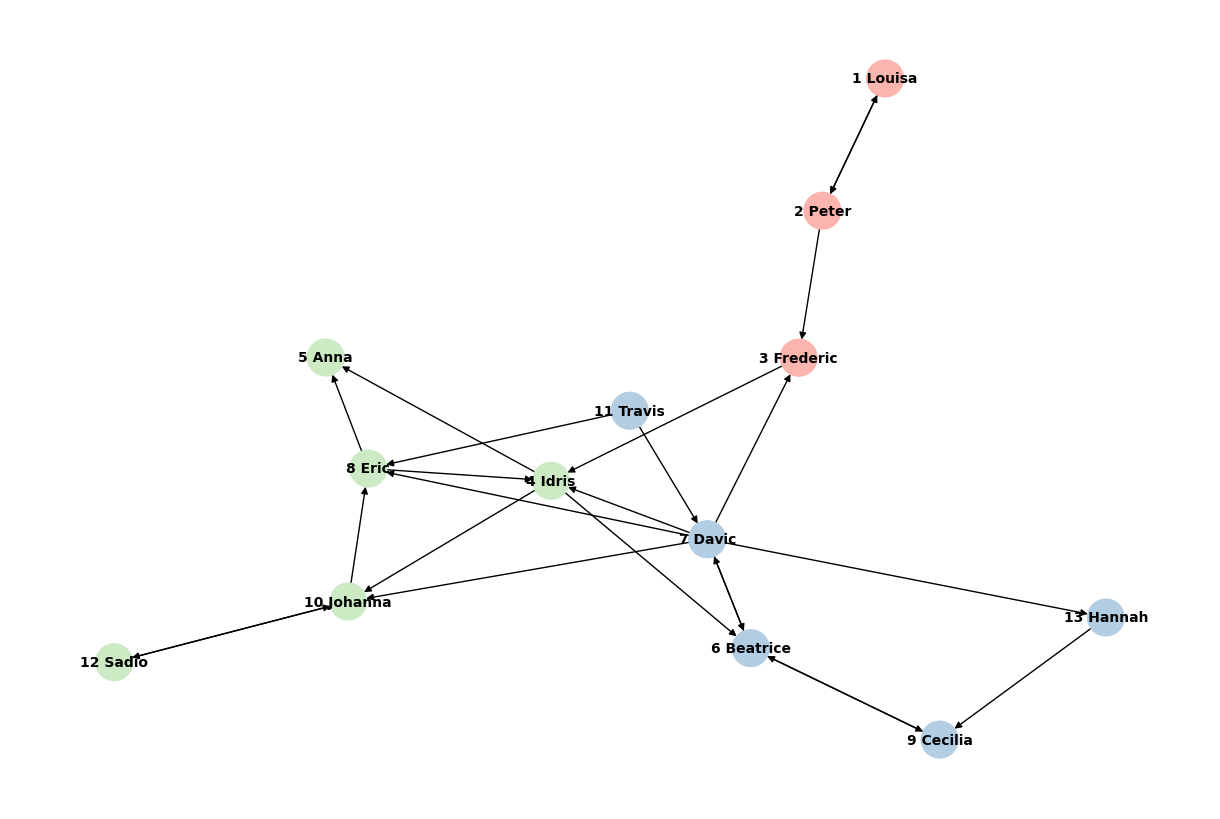

In [6]:
pos = nx.kamada_kawai_layout(G, pos=initial_pos)
plot_sociagram(G, communities, pos)